In [106]:
import pandas as pd

train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [107]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [108]:
def combined_function(dataframe):
    data = process_missing(dataframe)
    data_1 = process_age(data)
    data_2 = process_fare(data_1)
    data_3 = process_titles(data_2)
    data_4 = process_cabin(data_3)
    data_5 = create_dummies(data_4, "Age_categories")
    data_5 = create_dummies(data_5, "Fare_categories")
    data_5 = create_dummies(data_5, "Title")
    data_5 = create_dummies(data_5, "Cabin_type")
    data_5 = create_dummies(data_5, "Sex")
    return data_5

In [109]:
train = combined_function(train)
holdout = combined_function(holdout)

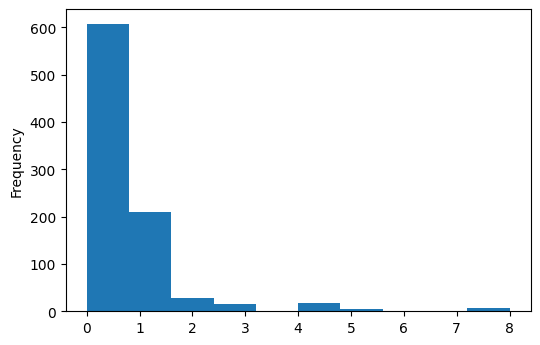

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train['SibSp'].plot.hist()
plt.show()

In [111]:
pivot_1 = pd.pivot_table(data=train, index='SibSp', values='Survived', aggfunc=np.mean)
print(pivot_1)

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


In [112]:
pivot_1.describe()

,Survived
count,7.000000
mean,0.251747
std,0.211610
min,0.000000
25%,0.083333
50%,0.250000
75%,0.404840
max,0.535885


In [113]:
pivot_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 8
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes


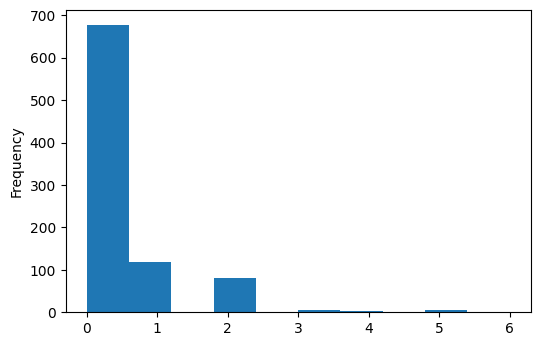

In [114]:
train['Parch'].plot.hist()
plt.show()

In [115]:
pivot_2 = pd.pivot_table(data=train, index='Parch', values='Survived', aggfunc=np.mean)
print(pivot_2)

       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


Creating a combined column - adding the 2 columns

In [116]:
train['SibSp & Parch'] = train['SibSp']+train['Parch']

In [133]:
holdout['SibSp & Parch'] = holdout['SibSp']+holdout['Parch']

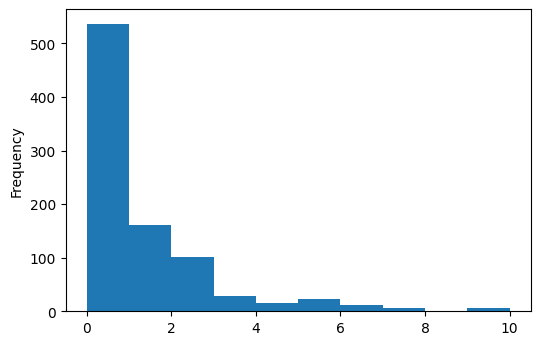

In [134]:
train['SibSp & Parch'].plot.hist()
plt.show()

               Survived
SibSp & Parch          
0              0.303538
1              0.552795
2              0.578431
3              0.724138
4              0.200000
5              0.136364
6              0.333333
7              0.000000
10             0.000000


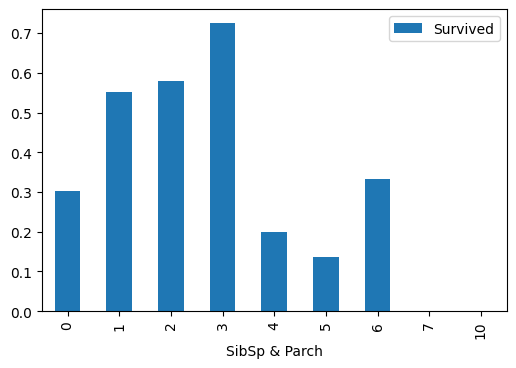

In [118]:
pivot_3 = pd.pivot_table(data=train, index='SibSp & Parch', values='Survived', aggfunc=np.mean)
print(pivot_3)
pivot_3.plot.bar()
plt.show()

It seems like people with more than 1 family member had higher chances of survival, up to a point (4+ family members)

In [119]:
def alone(dataframe):
    dataframe['family_count'] = dataframe['SibSp']+dataframe['Parch']

    dataframe['isalone'] = dataframe['family_count'].apply(lambda x: 0 if x>0 else 1)
    
    return dataframe

In [120]:
train = alone(train)
holdout = alone(holdout)

In [121]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Cabin_type_E Cabin_type_F  \
0      0         A/5 21171   7.2500  ...            0            0   
1      0          PC 17599  71.2833  ...            0            0   
2      0  STON/O2. 3101282   7.9250  ...            0            0   
3      0            113803  53.1000  ...

In [122]:
X = train.drop(['PassengerId', 'Survived'], axis=1)
y = train['Survived']

print(X.head())
print(y.head())

   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Embarked Age_categories  ...  \
0      1      0         A/5 21171   7.2500        S    Young Adult  ...   
1      1      0          PC 17599  71.2833        C          Adult  ...   
2      0      0  STON/O2. 3101282   7.9250        S    Young Adult  ...   
3      1      0            113803  53.1000        S    Young Adult  ...   
4      0      0            373450   8.0500        S    Young Adult  ...   

  Cabin_type_E Cabin_type_F Cabin_type_G  Cabin_type_T  Cabin_type_Unknown  \
0 

In [123]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

def select_features(dataframe):
    dataframe = dataframe.select_dtypes([np.number]).dropna(axis=1)
    all_X = dataframe.drop(['PassengerId', 'Survived'], axis=1)
    all_y = dataframe['Survived']
    
    rfc = RandomForestClassifier(random_state=1)
    
    rfecv = RFECV(estimator=rfc, cv=10)
    rfecv.fit(all_X, all_y)
    
    print(all_X.columns[rfecv.support_])
    
    return all_X.columns[rfecv.support_]

In [124]:
features = select_features(train)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B',
       'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F',
       'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'SibSp & Parch',
       'family_count', 'isalone'],
      dtype='object')


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(dataframe, features):
    all_X = dataframe.loc[:, features]
    all_y = dataframe['Survived']
    
    models = [{
                'name': "LogisticRegression",
                'estimator': LogisticRegression(),
                'hyperparameters': 
                    {
                     "solver": ["newton-cg", "lbfgs", "liblinear"]
                     }
                },
            
                {
                'name': 'KNeighborsClassifier',
                'estimator': KNeighborsClassifier(),
                'hyperparameters': 
                     {
                        "n_neighbors": range(1,20,2),
                        "weights": ["distance", "uniform"],
                        "algorithm": ["ball_tree", "kd_tree", "brute"],
                        "p": [1,2]
                    }
                },
    
                {
                'name': 'RandomForestClassifier',
                'estimator': RandomForestClassifier(),
                'hyperparameters':     
                        {
                        "n_estimators": [4, 6, 9],
                        "criterion": ["entropy", "gini"],
                        "max_depth": [2, 5, 10],
                        "max_features": ["log2", "sqrt"],
                        "min_samples_leaf": [1, 5, 8],
                        "min_samples_split": [2, 3, 5]
                        }   
                }]
    
    for m in models:
        print(m['name'])
        model = GridSearchCV(estimator= m['estimator'], param_grid= m['hyperparameters'], cv=10)
        model.fit(all_X, all_y)
        
        m['best_estimator'] = model.best_estimator_
        m['best_score'] = model.best_score_
        m['best_params'] = model.best_params_
        
        print(model.best_estimator_)
        print(model.best_score_)
        print(model.best_params_)
        
    return models

In [126]:
new = select_model(train, features)

LogisticRegression


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LogisticRegression(solver='newton-cg')
0.8204619225967541
{'solver': 'newton-cg'}
KNeighborsClassifier
KNeighborsClassifier(algorithm='brute', n_neighbors=7, p=1)
0.7856803995006242
{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
RandomForestClassifier
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=5, n_estimators=9)
0.835043695380774
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}


In [127]:
print(new)

[{'name': 'LogisticRegression', 'estimator': LogisticRegression(), 'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'best_estimator': LogisticRegression(solver='newton-cg'), 'best_score': 0.8204619225967541, 'best_params': {'solver': 'newton-cg'}}, {'name': 'KNeighborsClassifier', 'estimator': KNeighborsClassifier(), 'hyperparameters': {'n_neighbors': range(1, 20, 2), 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, 'best_estimator': KNeighborsClassifier(algorithm='brute', n_neighbors=7, p=1), 'best_score': 0.7856803995006242, 'best_params': {'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}}, {'name': 'RandomForestClassifier', 'estimator': RandomForestClassifier(), 'hyperparameters': {'n_estimators': [4, 6, 9], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 5, 10], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 5, 8], 'min_samples_split': [2, 3, 5]}, 'best_estimator': RandomForestCla

In [137]:
def save_submission_file(model, features, filename):
    predictions = model.predict(holdout[features])
    dataframe = pd.DataFrame({
                            "PassengerId": holdout['PassengerId'],
                            'Survived': predictions
                            })
    dataframe.to_csv(filename, index=False)

In [138]:
print(new)

[{'name': 'LogisticRegression', 'estimator': LogisticRegression(), 'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'best_estimator': LogisticRegression(solver='newton-cg'), 'best_score': 0.8204619225967541, 'best_params': {'solver': 'newton-cg'}}, {'name': 'KNeighborsClassifier', 'estimator': KNeighborsClassifier(), 'hyperparameters': {'n_neighbors': range(1, 20, 2), 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, 'best_estimator': KNeighborsClassifier(algorithm='brute', n_neighbors=7, p=1), 'best_score': 0.7856803995006242, 'best_params': {'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}}, {'name': 'RandomForestClassifier', 'estimator': RandomForestClassifier(), 'hyperparameters': {'n_estimators': [4, 6, 9], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 5, 10], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 5, 8], 'min_samples_split': [2, 3, 5]}, 'best_estimator': RandomForestCla

In [139]:
print(new[0]['best_score'])

0.8204619225967541


In [140]:
best_case = max(new, key=lambda x:x['best_score'])
best_model = best_case['best_estimator']
print(best_model)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=5, n_estimators=9)


In [141]:
save_submission_file(best_model,features,'submission.csv')

The submission was used for entry in the Kaggle competition: https://www.kaggle.com/c/titanic